In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
KEY_FILE_PATH = "key.txt"
API_KEY = ""
with open(KEY_FILE_PATH) as f:
  lines = f.readlines()
  API_KEY = lines[1].split(':')[1].strip()

In [3]:
url = "https://api.quiverquant.com/beta/live/housetrading"
headers = {'accept': 'application/json',
           'X-CSRFToken': 'TyTJwjuEC7VV7mOqZ622haRaaUr0x0Ng4nrwSRFKQs7vdoBcJlK9qjAS69ghzhFu',
           'Authorization': f"Token {API_KEY}"}
r = requests.get(url, headers=headers)
parsed = json.loads(r.content)
df = pd.DataFrame(parsed).set_index('Ticker')

In [4]:
df = df[df['Transaction'].isin(['Purchase', 'Sale'])]
df = df.drop(['Options', 'Option_Type', 'Expiry', 'Strike'], axis=1)
df['Amount'] = df['Amount'].astype(int)
df.head()

,Date,Representative,Transaction,Amount,Range
Ticker,,,,,
VGR,2023-03-31,Virginia Foxx,Purchase,1001,"$1,001-$15,000"
D,2023-03-29,Gerald E. Connolly,Sale,1001,"$1,001-$15,000"
LDOS,2023-03-29,Gerald E. Connolly,Sale,1001,"$1,001-$15,000"
SAIC,2023-03-29,Gerald E. Connolly,Sale,1001,"$1,001-$15,000"
PAA,2023-03-24,Virginia Foxx,Purchase,15001,"$15,001-$50,000"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4971 entries, VGR to VUZI
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            4971 non-null   object
 1   Representative  4971 non-null   object
 2   Transaction     4971 non-null   object
 3   Amount          4971 non-null   int64 
 4   Range           4971 non-null   object
dtypes: int64(1), object(4)
memory usage: 233.0+ KB


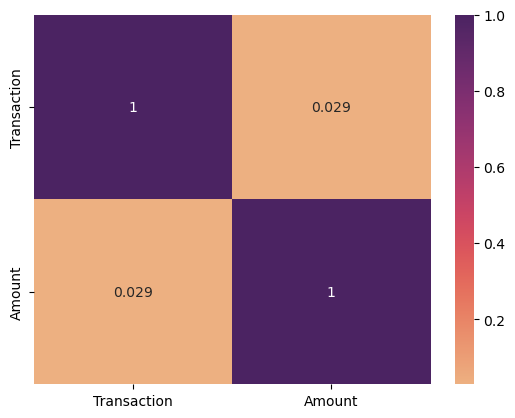

In [6]:
df_mapped = df.copy()
df_mapped['Transaction'] = df_mapped['Transaction'].map({'Purchase': 0, 'Sale': 1})
sns.heatmap(df_mapped.corr(numeric_only=True), cmap='flare', annot=True)
plt.show()

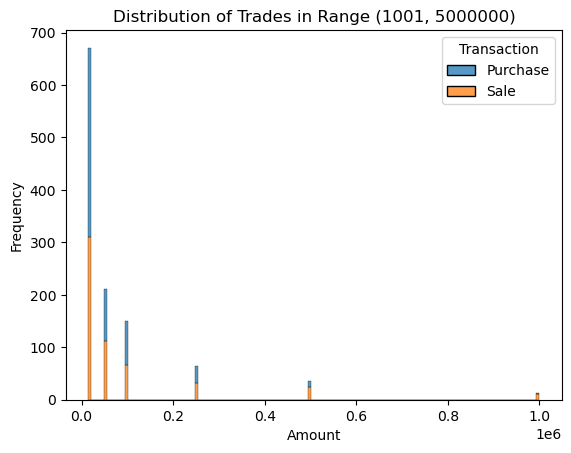

In [7]:
df_lt = df[(df['Amount'] > 1001) & (df['Amount'] < 5000000)]
sns.histplot(data=df_lt, x='Amount', hue='Transaction', multiple='stack')
plt.title('Distribution of Trades in Range (1001, 5000000)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [8]:
def graph_top_transactions(col, top=10, df=df):
  df_top = df.groupby([col, 'Transaction']).size().unstack().fillna(0)
  df_top['Total'] = df_top['Purchase'] + df_top['Sale']
  df_top = df_top.sort_values(by='Total', ascending=False)
  df_top.head(top)[['Purchase', 'Sale']].plot(kind='bar', stacked=True)
  plt.title('Top 10 Tickers by Number of Trades')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

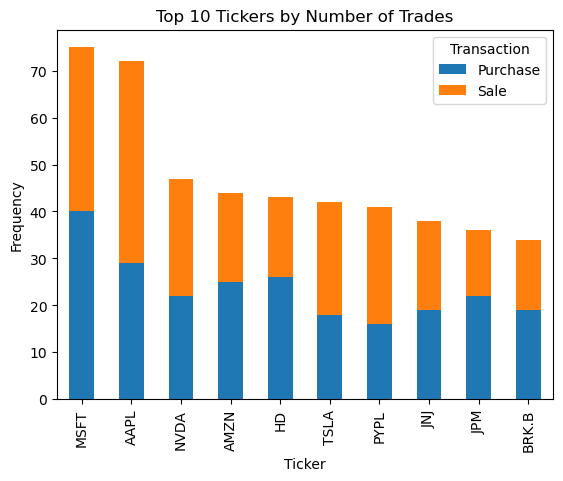

In [9]:
graph_top_transactions('Ticker')

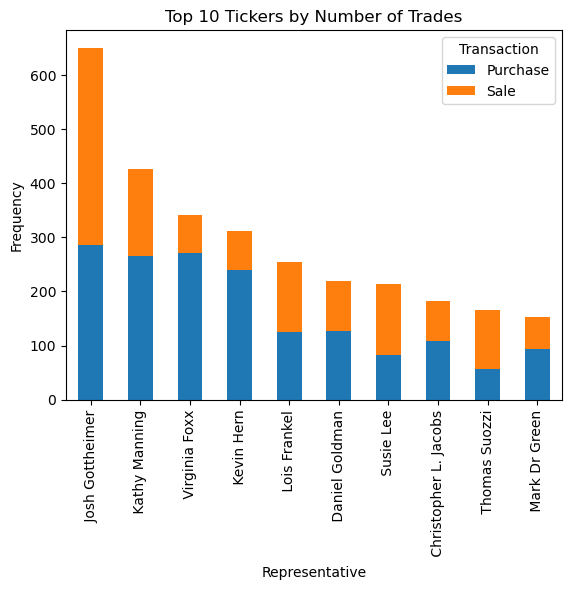

In [10]:
graph_top_transactions('Representative')